# AlexNet 구현

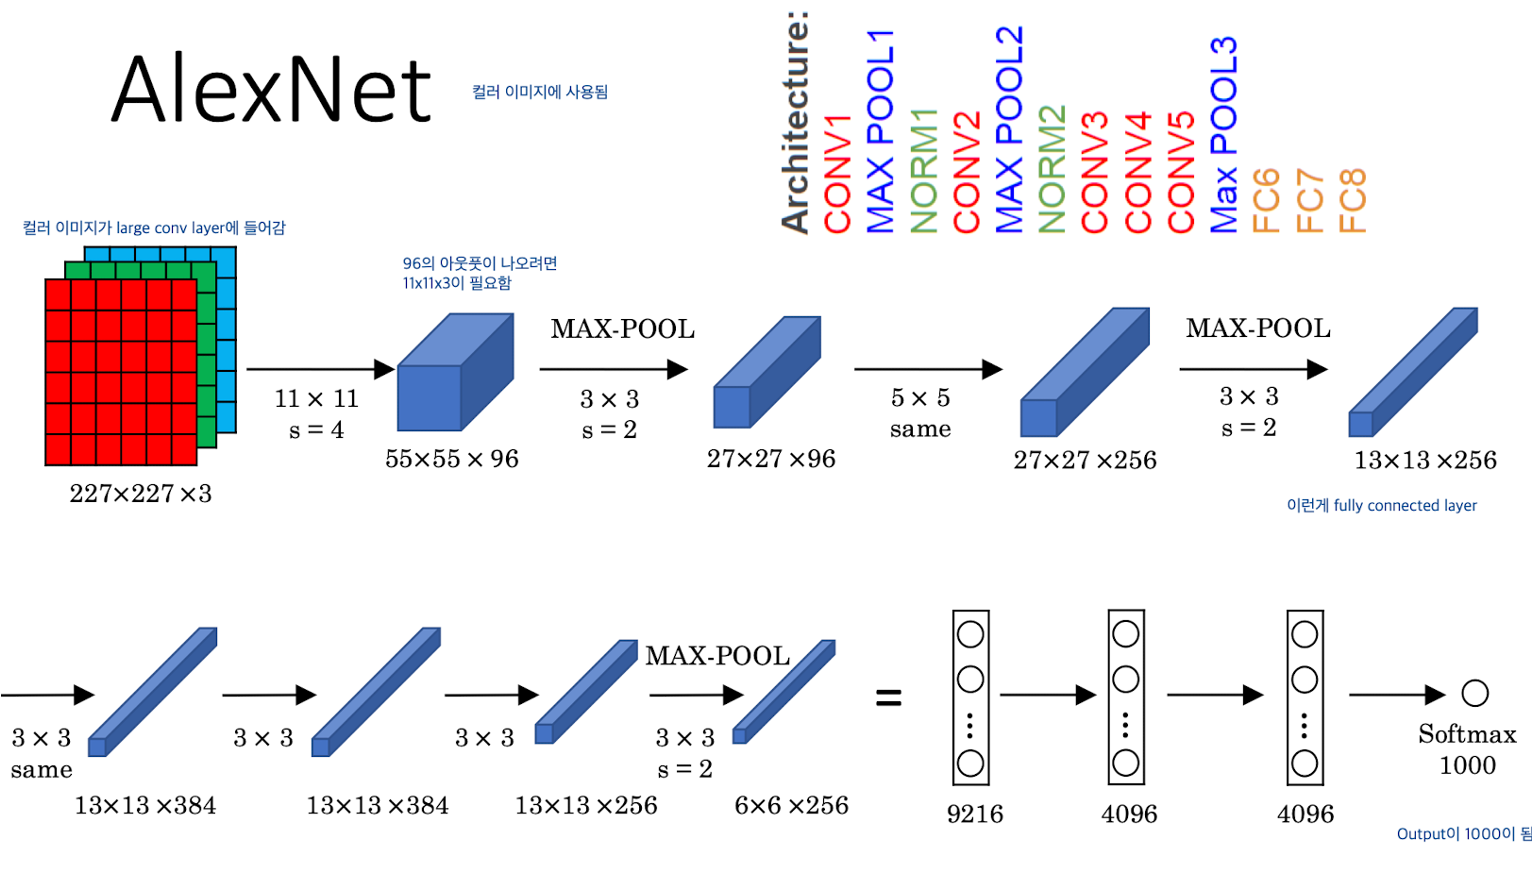

In [8]:
!pip install torchinfo

In [6]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super().__init__()
        self.features = nn.Sequential(
            # 첫 번째 Convolution: 입력 채널 3, 출력 채널 64, 커널 크기 11, stride 4, padding 2
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 두 번째 Convolution: 입력 64, 출력 192, 커널 크기 5, padding 2
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 세 번째 Convolution: 입력 192, 출력 384, 커널 크기 3, padding 1
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # 네 번째 Convolution: 입력 384, 출력 256, 커널 크기 3, padding 1
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # 다섯 번째 Convolution: 입력 256, 출력 256, 커널 크기 3, padding 1
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        # AdaptiveAvgPool를 사용하여 임의의 입력 크기에 대해 고정된 출력 크기 (6, 6)를 만듭니다.
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        # 첫 번째 차원을 제외하고 flatten합니다.
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# 모델 인스턴스 생성 및 테스트 예시
if __name__ == '__main__':
    model = AlexNet(num_classes=1000)
    print(model)

    # 임의의 입력 (배치 크기 1, 채널 3, 224x224 이미지)
    x = torch.randn(1, 3, 224, 224)
    output = model(x)
    print("출력 크기:", output.shape)  # 예상 출력: torch.Size([1, 1000])

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

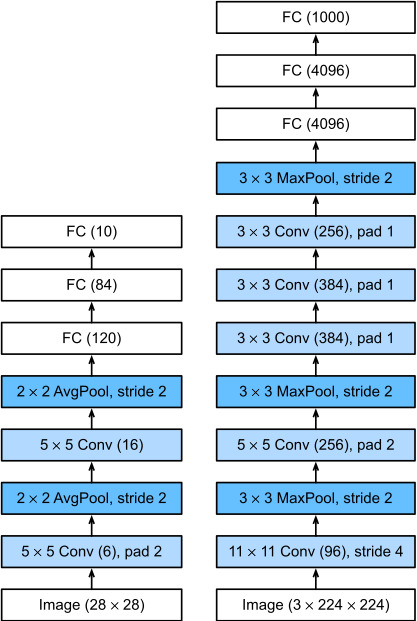

In [9]:
from torchinfo import summary
summary(model, input_size = (1, 3, 224, 224 ))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

## 사전 훈련된 모델 활용

파이토치에서 제공하는 알렉스넷 모델 : https://pytorch.org/vision/main/models/generated/torchvision.models.alexnet.html

https://docs.pytorch.org/vision/main/_modules/torchvision/models/alexnet.html



  

위의 모델 빌더는 **weights(가중치) 매개변수**로 다음 값을 허용합니다.  
**`AlexNet_Weights.DEFAULT`**는 **`AlexNet_Weights.IMAGENET1K_V1`**과 동일합니다.  
또한 문자열을 사용할 수도 있으며, 예를 들어 **`weights='DEFAULT'`** 또는 **`weights='IMAGENET1K_V1'`**처럼 지정할 수 있습니다.  

---

### **AlexNet_Weights.IMAGENET1K_V1:**
이 가중치는 논문의 결과를 간단한 학습 방법을 사용하여 거의 동일하게 재현한 것입니다.  
또한 **`AlexNet_Weights.DEFAULT`**로도 제공됩니다.  

#### **모델 성능 (ImageNet-1K 기준)**
- **Top-1 정확도 (acc@1):** 56.522%  
- **Top-5 정확도 (acc@5):** 79.066%  
- **총 파라미터 수:** 61,100,840  
- **최소 입력 이미지 크기:** 높이 63px, 너비 63px  
- **분류 가능한 카테고리:**  
  - 예시: **tench(숭어), goldfish(금붕어), great white shark(백상아리)** 등 (총 1000개 중 997개 생략)  
- **학습 방법 (recipe):** 링크 제공  
- **연산량 (GFLOPS):** 0.71 GFLOPS (1초당 약 7,100만 개의 부동소수점 연산 수행)  
- **모델 파일 크기:** 233.1MB  

---

### **추론(Inference) 변환**
**`AlexNet_Weights.IMAGENET1K_V1.transforms`**에서 제공하는 변환(transforms)은 다음과 같은 전처리 과정을 수행합니다.  

1. **입력 형식:**  
   - `PIL.Image` 객체  
   - 배치(batch) 형식: `(B, C, H, W)`  
   - 단일(single) 이미지 형식: `(C, H, W)`

2. **이미지 전처리 과정:**  
   - **리사이징(resizing):**  
     - **크기:** `resize_size=[256]`  
     - **보간법(interpolation):** `InterpolationMode.BILINEAR(양선형 보간법)` 사용  
   - **중앙 크롭(central crop):**  
     - **크기:** `crop_size=[224]`  
   - **정규화(normalization):**  
     - 픽셀 값 범위 변환: `[0.0, 1.0]`로 리스케일  
     - 평균(mean) 및 표준 편차(std) 사용하여 정규화  
       - **평균(mean):** `[0.485, 0.456, 0.406]`  
       - **표준 편차(std):** `[0.229, 0.224, 0.225]`  

이러한 전처리는 모델이 학습된 데이터와 동일한 입력 형태를 유지하도록 하기 위해 필요합니다.

In [12]:
# 모델 구조

from torchvision import models

model = models.alexnet(weights = 'AlexNet_Weights.IMAGENET1K_V1')
model

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:02<00:00, 113MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [13]:
summary(model, (1, 3, 224, 224), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

In [17]:
# 클래스 정보 파일 불러오기
# https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

import requests

# URL 설정
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"

# 요청하여 파일 불러오기
response = requests.get(url)

# 텍스트 데이터를 리스트로 변환 (각 줄을 요소로 저장)
imagenet_classes = response.text.strip().split("\n")

# 결과 확인 (앞부분 10개 출력)
print(imagenet_classes)  # ['tench, Tinca tinca', 'goldfish, Carassius auratus', ...]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

In [18]:
print("클래스 개수 : ", len(imagenet_classes))

클래스 개수 :  1000


## 모델 활용하기

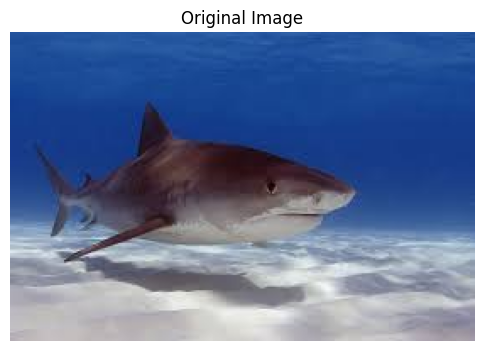

Top 5 예측 결과:
tiger shark: 0.9962
hammerhead: 0.0020
great white shark: 0.0008
dugong: 0.0004
axolotl: 0.0002


In [19]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 1. 이미지 다운로드 및 로드
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPqUIvVs_Q2veVfJXJgmU4HqJDedpaLTb5Vg&s'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')  # 확실한 RGB 변환

# 이미지 시각화 (원본 이미지)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()

# 2. 전처리: AlexNet은 ImageNet 기준으로 학습되었으므로, 해당 전처리 과정을 사용합니다.
preprocess = transforms.Compose([
    transforms.Resize(256),               # 짧은 변을 256픽셀로 조정
    transforms.CenterCrop(224),           # 정중앙에서 224x224 크롭
    transforms.ToTensor(),                # 텐서 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet 평균
                         std=[0.229, 0.224, 0.225])   # ImageNet 표준편차
])

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)  # 배치 차원 추가

# 3. 모델 로드 및 평가 모드 설정
model = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')
model.eval()  # 평가 모드로 전환

# 4. 추론 진행 (with torch.no_grad()로 gradient 계산 방지)
with torch.no_grad():
    output = model(batch_t)

# 5. softmax를 통해 클래스 확률 계산 및 Top5 예측
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

print("Top 5 예측 결과:")
for i in range(top5_prob.size(0)):
    print(f"{imagenet_classes[top5_catid[i]]}: {top5_prob[i].item():.4f}")


In [20]:
# -*- coding: utf-8 -*-
"""
목표: nn.LSTM의 실행 흐름을 코드로 상세히 확인
- 입력 텐서 x 생성 (batch_first=True)
- LSTM 순전파 실행
- 반환값 output, h_n, c_n의 의미와 shape 확인
- 마지막 타임스텝/레이어 상태를 추출하는 2가지 방법
- (옵션) 한 스텝씩 unroll하여 hidden/cell의 갱신 흐름 살펴보기
"""

import torch
import torch.nn as nn

# ===== 0. 재현성 및 디바이스 =====
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[Device] {device}")

# ===== 1. 하이퍼파라미터/입력 준비 =====
num_features    = 3      # 입력 벡터 차원 (input_size)
sequence_length = 10     # 시퀀스 길이 (time steps)
batch_size      = 2      # 배치 크기
hidden_size     = 8      # 각 레이어의 hidden/state 차원
num_layers      = 4      # LSTM 레이어 수 (stacked LSTM)

# 입력 x: (batch, seq_len, input_size)  # batch_first=True를 사용할 것이므로 이 순서
x = torch.randn(batch_size, sequence_length, num_features, device=device)
print(f"[Input] x.shape = {x.shape}  # (B, T, F) = ({batch_size}, {sequence_length}, {num_features})")

# ===== 2. LSTM 레이어 정의 =====
lstm_layer = nn.LSTM(
    input_size=num_features,
    hidden_size=hidden_size,
    num_layers=num_layers,
    batch_first=True,   # (B, T, F) 형태의 입력을 받음
).to(device)

print(f"[LSTM] input_size={num_features}, hidden_size={hidden_size}, num_layers={num_layers}, batch_first=True")

# ===== 3. 순전파 (forward) =====
# 반환값:
# - output: 모든 타임스텝의 hidden state (마지막 레이어 기준)
# - (h_n, c_n): 각 레이어의 '마지막 타임스텝' hidden/cell state
output, (h_n, c_n) = lstm_layer(x)

print("\n[Forward Done]")
print(f"output.shape = {output.shape}  # (B, T, H) = ({batch_size}, {sequence_length}, {hidden_size})")
print(f"h_n.shape    = {h_n.shape}     # (L, B, H) = ({num_layers}, {batch_size}, {hidden_size})")
print(f"c_n.shape    = {c_n.shape}     # (L, B, H) = ({num_layers}, {batch_size}, {hidden_size})")

# ===== 4. 의미 정리 =====
# output: 마지막 레이어의 hidden state를 타임스텝 T개 모두 모아둔 텐서
# h_n:    각 레이어별로 '마지막 타임스텝(T-1)의 hidden state'를 모아둔 텐서
# c_n:    각 레이어별로 '마지막 타임스텝(T-1)의 cell state'를 모아둔 텐서

# ===== 5. 마지막 타임스텝/레이어의 벡터를 얻는 2가지 전형적인 방법 =====

# (A) 방법1: output에서 마지막 타임스텝만 꺼내기 → 마지막 레이어의 h_T
last_t_from_output = output[:, -1, :]         # shape: (B, H)
print(f"\n(A) output[:, -1, :].shape = {last_t_from_output.shape}  # (B, H)")

# (B) 방법2: h_n에서 마지막 레이어만 꺼내기 → 마지막 레이어의 h_T
last_layer_from_hn = h_n[-1, :, :]            # shape: (B, H)
print(f"(B) h_n[-1].shape           = {last_layer_from_hn.shape}   # (B, H)")

# 두 값은 동일해야 함 (동일 레이어/시점의 hidden state이므로)
diff = (last_t_from_output - last_layer_from_hn).abs().max().item()
print(f"→ 두 방법 차이의 최대 절대값 = {diff:.6f} (이 값이 0에 매우 가까우면 동일하다고 보면 됨)")

# (참고) c_n[-1]은 마지막 레이어의 'cell state' (LSTM만의 장기기억 저장소)
print(f"c_n[-1].shape = {c_n[-1].shape}  # (B, H)  # 마지막 레이어의 최종 cell state")

# ===== 6. 실전 사용 예시: 마지막 상태로 분류기 붙이기 =====
#   - 시퀀스 전체를 요약한 벡터(예: last_t_from_output 또는 h_n[-1])를 사용해 분류기/회귀기 등에 연결
num_classes = 5
classifier = nn.Linear(hidden_size, num_classes).to(device)

logits = classifier(last_t_from_output)  # or classifier(h_n[-1])
print(f"\n[Head] logits.shape = {logits.shape}  # (B, C) = ({batch_size}, {num_classes})")

# ===== 7. (옵션) 한 스텝씩 Unroll하여 상태 갱신 흐름 보기 =====
# 아래는 교육용 데모: for 루프로 타임스텝을 하나씩 진행하며 (h, c)가 어떻게 업데이트되는지 확인
print("\n[Unroll] 한 스텝씩 진행하여 (h, c) 갱신 관찰")
h = torch.zeros(num_layers, batch_size, hidden_size, device=device)
c = torch.zeros(num_layers, batch_size, hidden_size, device=device)

for t in range(sequence_length):
    # x[:, t:t+1, :] → 현재 타임스텝 t만 포함하는 길이 1의 시퀀스 (batch_first=True 유지)
    out_t, (h, c) = lstm_layer(x[:, t:t+1, :], (h, c))
    # out_t.shape: (B, 1, H)  # 마지막 레이어의 현재 타임스텝 hidden
    print(f"  t={t:02d} | out_t.shape={out_t.shape}, h.shape={h.shape}, c.shape={c.shape}")

# 루프 종료 후의 h, c는 전체 시퀀스를 한 번에 돌렸을 때의 h_n, c_n과 동일해야 함
max_diff_h = (h - h_n).abs().max().item()
max_diff_c = (c - c_n).abs().max().item()
print(f"\n[Check] step-by-step h vs. h_n  max|diff| = {max_diff_h:.6f}")
print(f"[Check] step-by-step c vs. c_n  max|diff| = {max_diff_c:.6f}")


[Device] cpu
[Input] x.shape = torch.Size([2, 10, 3])  # (B, T, F) = (2, 10, 3)
[LSTM] input_size=3, hidden_size=8, num_layers=4, batch_first=True

[Forward Done]
output.shape = torch.Size([2, 10, 8])  # (B, T, H) = (2, 10, 8)
h_n.shape    = torch.Size([4, 2, 8])     # (L, B, H) = (4, 2, 8)
c_n.shape    = torch.Size([4, 2, 8])     # (L, B, H) = (4, 2, 8)

(A) output[:, -1, :].shape = torch.Size([2, 8])  # (B, H)
(B) h_n[-1].shape           = torch.Size([2, 8])   # (B, H)
→ 두 방법 차이의 최대 절대값 = 0.000000 (이 값이 0에 매우 가까우면 동일하다고 보면 됨)
c_n[-1].shape = torch.Size([2, 8])  # (B, H)  # 마지막 레이어의 최종 cell state

[Head] logits.shape = torch.Size([2, 5])  # (B, C) = (2, 5)

[Unroll] 한 스텝씩 진행하여 (h, c) 갱신 관찰
  t=00 | out_t.shape=torch.Size([2, 1, 8]), h.shape=torch.Size([4, 2, 8]), c.shape=torch.Size([4, 2, 8])
  t=01 | out_t.shape=torch.Size([2, 1, 8]), h.shape=torch.Size([4, 2, 8]), c.shape=torch.Size([4, 2, 8])
  t=02 | out_t.shape=torch.Size([2, 1, 8]), h.shape=torch.Size([4, 2, 8]), c.shape=torch.S